In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

%matplotlib inline

# Hyperparamete

In [2]:
N = 1000
size = 5
TOL = 1e-6

# Create Data

In [3]:
def create_data(size):
    A_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            if i == j:
                A_matrix[i][j] = 2*(i+1)
            if j == (i+2) or j == (i-2):
                A_matrix[i][j] = 0.5*(i+1)
            if j == (i+4) or j == (i-4):
                A_matrix[i][j] = 0.25*(i+1)    
    B_vector = np.array([np.pi for i in range(size)])
                
    return A_matrix,B_vector

In [4]:
def escape(old_x,new_x,TOL):
    if np.max(np.abs(old_x - new_x)) < TOL:
        return True,np.max(np.abs(old_x - new_x))
    return False,np.max(np.abs(old_x - new_x))

In [5]:
def draw(loss,title=None):
    ite = [i for i in range(1,len(loss)+1,1)]
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    if title is not None:
        ax.set_title(title)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.plot(ite,loss,lw = 1,zorder = 10,label = 'norm')
    ax.grid(linestyle="--",linewidth = 0.5,zorder = 0)#pair0
    ax.legend()

In [6]:
Test_matrix = np.array(
    [
    [10,-1,2,0],
    [-1,11,-1,3],
    [2,-1,10,-1],
    [0,3,-1,8]]
)
tb_matrix = np.array(
    [6,25,-11,15]
)

# Jacobi Method

In [7]:
def Jacobin(A_matrix,B_matrix,test =False):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j]*x_p[j]
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

In [8]:
Jacobin(Test_matrix,tb_matrix,True)[0]

[0. 0. 0. 0.]
[ 0.6         2.27272727 -1.1         1.875     ]
[ 1.04727273  1.71590909 -0.80522727  0.88522727]
[ 0.93263636  2.05330579 -1.04934091  1.13088068]
[ 1.01519876  1.95369576 -0.96810863  0.97384272]
[ 0.9889913   2.01141473 -1.0102859   1.02135051]
[ 1.00319865  1.99224126 -0.99452174  0.99443374]
[ 0.99812847  2.00230688 -1.00197223  1.00359431]
[ 1.00062513  1.9986703  -0.99903558  0.99888839]
[ 0.99967415  2.00044767 -1.00036916  1.00061919]
[ 1.0001186   1.99976795 -0.99982814  0.99978598]
[ 0.99994242  2.00008477 -1.00006833  1.0001085 ]
[ 1.00002214  1.99995896 -0.99996916  0.99995967]
[ 0.99998973  2.00001582 -1.00001257  1.00001924]
[ 1.00000409  1.99999268 -0.99999444  0.9999925 ]
[ 0.99999816  2.00000292 -1.0000023   1.00000344]
[ 1.00000075  1.99999868 -0.99999899  0.99999862]
[ 0.99999967  2.00000054 -1.00000042  1.00000062]


array([ 1.00000014,  1.99999976, -0.99999982,  0.99999975])

1000
5
[1.52965664 0.73303829 0.11780998 0.20943951 0.0935    ]
17


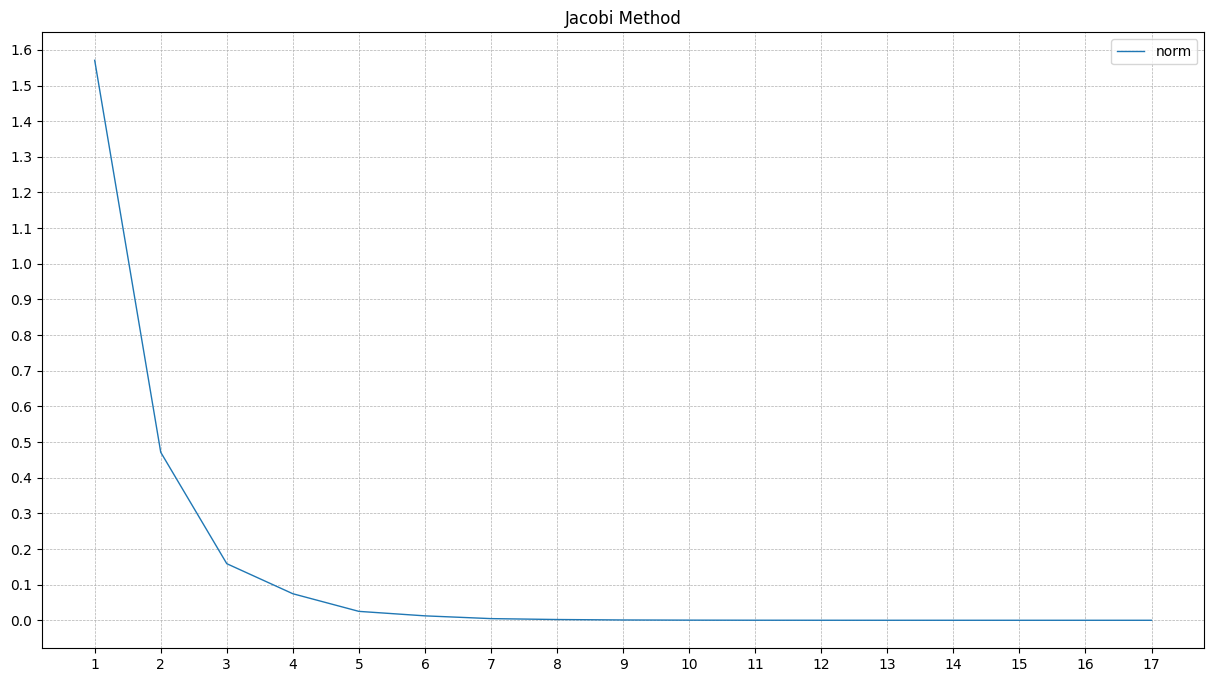

In [9]:
x,loss,k = Jacobin(create_data(size)[0],create_data(size)[1])
print(N)
print(size)
print(x)
print(k)
draw(loss,'Jacobi Method')

# Gauss-Seidel Method

In [10]:
def Gauss_Seidel(A_matrix,B_matrix,test=False):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j] * x[j]
                
            x[i] = (-summ + B_matrix[i])/A_matrix[i][i]
            
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

In [11]:
Gauss_Seidel(Test_matrix,tb_matrix,True)[0]

[0. 0. 0. 0.]
[ 0.6         2.32727273 -0.98727273  0.87886364]
[ 1.03018182  2.03693802 -1.0144562   0.98434122]
[ 1.00658504  2.00355502 -1.00252738  0.99835095]
[ 1.00086098  2.00029825 -1.00030728  0.99984975]
[ 1.00009128  2.00002134 -1.00003115  0.9999881 ]
[ 1.00000836  2.00000117 -1.00000275  0.99999922]
[ 1.00000067  2.00000002 -1.00000021  0.99999996]


array([ 1.00000004,  1.99999999, -1.00000001,  1.        ])

1000
5
[1.52965645 0.73303829 0.11780971 0.20943951 0.09349978]
7


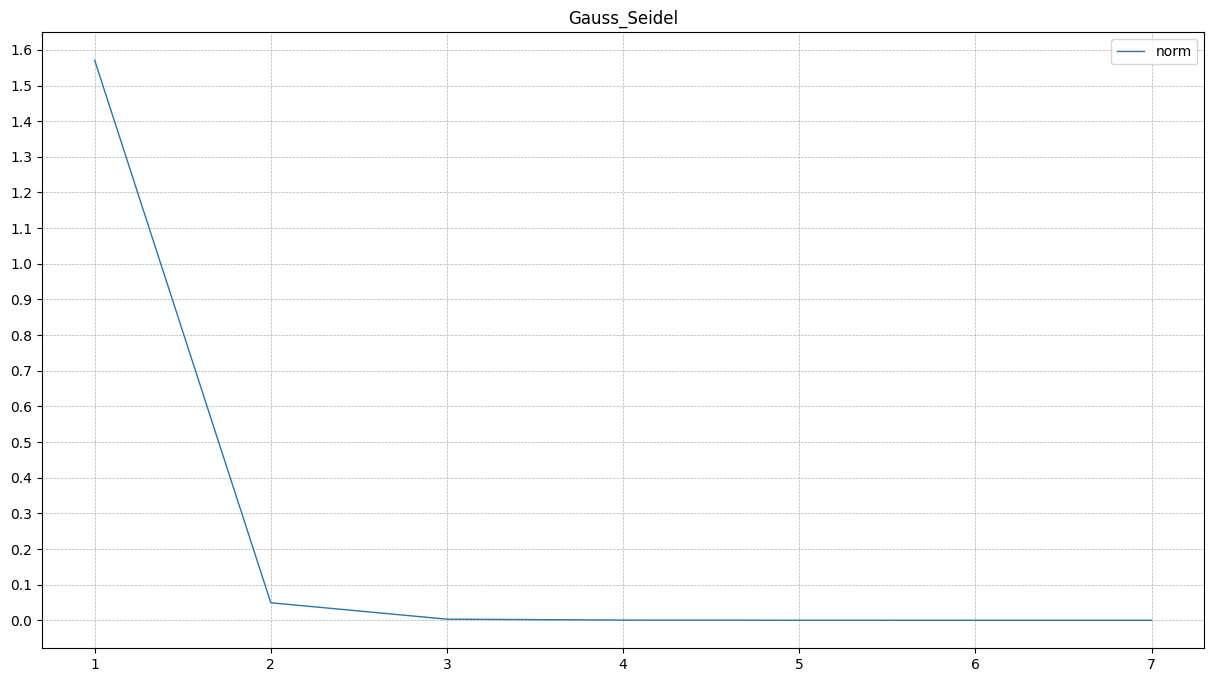

In [12]:
x,loss,k = Gauss_Seidel(create_data(size)[0],create_data(size)[1])
print(N)
print(size)
print(x)
print(k)
draw(loss,'Gauss_Seidel')

# Relaxdion Techniques  Method(SOR)

In [14]:
def SOR(A_matrix,B_matrix,w = 1,test=False):
    
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.zeros_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j] * x[j]
                
            x[i] = (w)*(-summ + B_matrix[i])/A_matrix[i][i] + x_p[i]*(1-w)
            
            
            
        esp = escape(x_p,x,TOL)[0]
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

# Conjugate Gradient Method